<a href="https://colab.research.google.com/github/jiin124/Kaggle/blob/main/Tabular_Playground_Series_Jan_2022/Tabular_Playground_Series_Jan_2022_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')


In [2]:
import os
import warnings
import holidays
import dateutil.easter as easter

In [3]:
os.environ['KAGGLE_USERNAME']='jiinpp'
os.environ['KAGGLE_KEY']="b06d525a9f66198051ccb648b091778a"

In [4]:
!kaggle competitions download -c tabular-playground-series-jan-2022

  0% 0.00/64.2k [00:00<?, ?B/s]
100% 64.2k/64.2k [00:00<00:00, 7.39MB/s]
  0% 0.00/186k [00:00<?, ?B/s]
100% 186k/186k [00:00<00:00, 11.8MB/s]
  0% 0.00/306k [00:00<?, ?B/s]
100% 306k/306k [00:00<00:00, 93.0MB/s]


In [5]:
!unzip '*.zip'

Archive:  train.csv.zip
  inflating: train.csv               


In [6]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')


In [7]:
sample=pd.read_csv('sample_submission.csv',index_col=0)

In [ ]:
train.head()

,row_id,date,country,store,product,num_sold
0,0,2015-01-01,Finland,KaggleMart,Kaggle Mug,329
1,1,2015-01-01,Finland,KaggleMart,Kaggle Hat,520
2,2,2015-01-01,Finland,KaggleMart,Kaggle Sticker,146
3,3,2015-01-01,Finland,KaggleRama,Kaggle Mug,572
4,4,2015-01-01,Finland,KaggleRama,Kaggle Hat,911


In [ ]:
test.head()

,row_id,date,country,store,product
0,26298,2019-01-01,Finland,KaggleMart,Kaggle Mug
1,26299,2019-01-01,Finland,KaggleMart,Kaggle Hat
2,26300,2019-01-01,Finland,KaggleMart,Kaggle Sticker
3,26301,2019-01-01,Finland,KaggleRama,Kaggle Mug
4,26302,2019-01-01,Finland,KaggleRama,Kaggle Hat


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26298 entries, 0 to 26297
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   row_id    26298 non-null  int64 
 1   date      26298 non-null  object
 2   country   26298 non-null  object
 3   store     26298 non-null  object
 4   product   26298 non-null  object
 5   num_sold  26298 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 1.2+ MB


# 전처리

## LabelEncoder

In [8]:
from sklearn.preprocessing import LabelEncoder

for col in ['country','store','product']:
  train[col+'_label']=LabelEncoder().fit_transform(train[col])
  test[col+'_label']=LabelEncoder().fit_transform(test[col])

## feature engineering

Thx!!!
https://www.kaggle.com/lucamassaron/festivities-in-finland-norway-sweden

In [9]:
holiday_list = list()

In [10]:
import holidays
import dateutil.easter as easter

In [11]:
#Finland

for date in holidays.Finland(years=[2015,2016,2017,2018,2019],observed=True).items():
  print(str(date[0]),date[1])
  holiday_list.append([date[0],date[1],"Finland"])

2016-01-01 Uudenvuodenpäivä
2016-01-06 Loppiainen
2016-03-25 Pitkäperjantai
2016-03-27 Pääsiäispäivä
2016-03-28 2. pääsiäispäivä
2016-05-01 Vappu
2016-05-05 Helatorstai
2016-05-15 Helluntaipäivä
2016-06-25 Juhannuspäivä
2016-11-05 Pyhäinpäivä
2016-12-06 Itsenäisyyspäivä
2016-12-25 Joulupäivä
2016-12-26 Tapaninpäivä
2016-06-24 Juhannusaatto
2016-12-24 Jouluaatto
2017-01-01 Uudenvuodenpäivä
2017-01-06 Loppiainen
2017-04-14 Pitkäperjantai
2017-04-16 Pääsiäispäivä
2017-04-17 2. pääsiäispäivä
2017-05-01 Vappu
2017-05-25 Helatorstai
2017-06-04 Helluntaipäivä
2017-06-24 Juhannuspäivä
2017-11-04 Pyhäinpäivä
2017-12-06 Itsenäisyyspäivä
2017-12-25 Joulupäivä
2017-12-26 Tapaninpäivä
2017-06-23 Juhannusaatto
2017-12-24 Jouluaatto
2018-01-01 Uudenvuodenpäivä
2018-01-06 Loppiainen
2018-03-30 Pitkäperjantai
2018-04-01 Pääsiäispäivä
2018-04-02 2. pääsiäispäivä
2018-05-01 Vappu
2018-05-10 Helatorstai
2018-05-20 Helluntaipäivä
2018-06-23 Juhannuspäivä
2018-11-03 Pyhäinpäivä
2018-12-06 Itsenäisyyspäivä
2

In [14]:
#Norway

for date in holidays.Norway(years=[2015,2016,2017,2018,2019],observed=True).items():
  print(str(date[0]),date[1])
  holiday_list.append([date[0],date[1],"Norway"])

2016-01-03 Søndag
2016-01-10 Søndag
2016-01-17 Søndag
2016-01-24 Søndag
2016-01-31 Søndag
2016-02-07 Søndag
2016-02-14 Søndag
2016-02-21 Søndag
2016-02-28 Søndag
2016-03-06 Søndag
2016-03-13 Søndag
2016-03-20 Søndag
2016-03-27 Første påskedag, Søndag
2016-04-03 Søndag
2016-04-10 Søndag
2016-04-17 Søndag
2016-04-24 Søndag
2016-05-01 Arbeidernes dag, Søndag
2016-05-08 Søndag
2016-05-15 Første pinsedag, Søndag
2016-05-22 Søndag
2016-05-29 Søndag
2016-06-05 Søndag
2016-06-12 Søndag
2016-06-19 Søndag
2016-06-26 Søndag
2016-07-03 Søndag
2016-07-10 Søndag
2016-07-17 Søndag
2016-07-24 Søndag
2016-07-31 Søndag
2016-08-07 Søndag
2016-08-14 Søndag
2016-08-21 Søndag
2016-08-28 Søndag
2016-09-04 Søndag
2016-09-11 Søndag
2016-09-18 Søndag
2016-09-25 Søndag
2016-10-02 Søndag
2016-10-09 Søndag
2016-10-16 Søndag
2016-10-23 Søndag
2016-10-30 Søndag
2016-11-06 Søndag
2016-11-13 Søndag
2016-11-20 Søndag
2016-11-27 Søndag
2016-12-04 Søndag
2016-12-11 Søndag
2016-12-18 Søndag
2016-12-25 Første juledag, Sønd

In [15]:
#sweden
for date in holidays.Sweden(years=[2015,2016,2017,2018,2019],observed=True).items():
  if date[1]!='Söndag':
    print(str(date[0]),date[1].replace(", Söndag",""))
    holiday_list.append([date[0],date[1].replace(", Söndag",""),"Sweden"])

2016-03-27 Påskdagen
2016-05-01 Första maj
2016-05-15 Pingstdagen
2016-12-25 Juldagen
2016-01-01 Nyårsdagen
2016-01-06 Trettondedag jul
2016-06-06 Sveriges nationaldag
2016-12-24 Julafton
2016-12-26 Annandag jul
2016-12-31 Nyårsafton
2016-03-25 Långfredagen
2016-03-28 Annandag påsk
2016-05-05 Kristi himmelsfärdsdag
2016-06-24 Midsommarafton
2016-06-25 Midsommardagen
2016-11-05 Alla helgons dag
2017-01-01 Nyårsdagen
2017-04-16 Påskdagen
2017-06-04 Pingstdagen
2017-12-24 Julafton
2017-12-31 Nyårsafton
2017-01-06 Trettondedag jul
2017-05-01 Första maj
2017-06-06 Sveriges nationaldag
2017-12-25 Juldagen
2017-12-26 Annandag jul
2017-04-14 Långfredagen
2017-04-17 Annandag påsk
2017-05-25 Kristi himmelsfärdsdag
2017-06-23 Midsommarafton
2017-06-24 Midsommardagen
2017-11-04 Alla helgons dag
2018-04-01 Påskdagen
2018-05-20 Pingstdagen
2018-01-01 Nyårsdagen
2018-01-06 Trettondedag jul
2018-05-01 Första maj
2018-06-06 Sveriges nationaldag
2018-12-24 Julafton
2018-12-25 Juldagen
2018-12-26 Annanda

In [16]:
holidays_df=pd.DataFrame(holiday_list,columns=['date','holiday','country'])
holidays_df['date']=pd.to_datetime(holidays_df['date'])

In [17]:
holidays_df.shape

(462, 3)

In [18]:
holidays_df.head(5)

,date,holiday,country
0,2016-01-01,Uudenvuodenpäivä,Finland
1,2016-01-06,Loppiainen,Finland
2,2016-03-25,Pitkäperjantai,Finland
3,2016-03-27,Pääsiäispäivä,Finland
4,2016-03-28,2. pääsiäispäivä,Finland


In [19]:
special_dates_list = list()

# Last week of the year
for year in [2015, 2016, 2017, 2018, 2019]:
    for i, day in enumerate(range(24, 32)):
        for country in ['Finland', 'Sweden', 'Norway']:
             special_dates_list.append([pd.to_datetime(f"{year}-{12}-{day}").date(), 
                                  f"Last week of the year (day {i+1})", 
                                  country])
# Swedish Rock Concert
for start, end, year in [[3,6,2015],[8,11,2016],[7,10,2017],[6,10,2018],[5,8,2019]]:
    for i, day in enumerate(range(start, end+1)):
        special_dates_list.append([pd.to_datetime(f"{year}-{6}-{day}").date(), 
                                  f"Swedish Rock Concert (day {i+1})", 
                                  "Sweden"])
        
# Last Wednesday of June
for date in ['2015-06-24', '2016-06-29', '2017-06-28', '2018-06-27', '2019-06-26']:
    for country in ['Finland', 'Sweden', 'Norway']:
         special_dates_list.append([pd.to_datetime(date).date(), 
                                  f"Last Wednesday of June", 
                                  country])
            
# First Sunday of November
for date in ['2015-11-1', '2016-11-6', '2017-11-5', '2018-11-4', '2019-11-3']:
    for country in ['Finland', 'Sweden', 'Norway']:
         special_dates_list.append([pd.to_datetime(date).date(), 
                                  f"First Sunday of November", 
                                  country])
            
# Independence Day of Finland
for year in [2015, 2016, 2017, 2018, 2019]:
    special_dates_list.append([pd.to_datetime(f"{year}-{12}-{6}").date(), 
                                      f"Independence Day of Finland", 
                                      'Finland'])

# Easter
easter_date = [easter.easter(y) for y in [2015, 2016, 2017, 2018, 2019]]
for date in easter_date:
    for country in ['Finland', 'Sweden', 'Norway']:
         special_dates_list.append([pd.to_datetime(date).date(), 
                                  f"Easter", 
                                  country])


In [20]:
special_dates_df = pd.DataFrame(special_dates_list, columns=['date', 'special_dates', 'country'])
special_dates_df['date'] = pd.to_datetime(special_dates_df['date'])

In [21]:
special_dates_df.shape

(191, 3)

In [22]:
special_dates_df.head()

,date,special_dates,country
0,2015-12-24,Last week of the year (day 1),Finland
1,2015-12-24,Last week of the year (day 1),Sweden
2,2015-12-24,Last week of the year (day 1),Norway
3,2015-12-25,Last week of the year (day 2),Finland
4,2015-12-25,Last week of the year (day 2),Sweden


In [23]:
from datetime import datetime
def feature_engineering(df):

    df['date'] = pd.to_datetime(df['date'])
    df['year'] = df['date'].dt.year
    df['month']= df['date'].dt.month
    df['week']= df['date'].dt.week
    df['day'] = df['date'].dt.day
    df['quarter'] = df['date'].dt.quarter
    df['dayofyear'] = df['date'].dt.dayofyear
    df['weekend'] = df['date'].dt.weekday >=5
    df['weekday'] = df['date'].dt.weekday
    
    # holidays & special_dates
    df = df.merge(holidays_df, on=['date', 'country'], how='left')
    df = df.merge(special_dates_df, on=['date', 'country'], how='left')

    df['is_holiday'] = df['holiday'].apply(lambda x: True if not pd.isnull(x) else False)
    df['is_special_dates'] = df['special_dates'].apply(lambda x: True if not pd.isnull(x) else False)
    
    return df


train=feature_engineering(train)
test=feature_engineering(test)
test.info(verbose=True,memory_usage="deep")


<class 'pandas.core.frame.DataFrame'>
Int64Index: 6570 entries, 0 to 6569
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   row_id            6570 non-null   int64         
 1   date              6570 non-null   datetime64[ns]
 2   country           6570 non-null   object        
 3   store             6570 non-null   object        
 4   product           6570 non-null   object        
 5   country_label     6570 non-null   int64         
 6   store_label       6570 non-null   int64         
 7   product_label     6570 non-null   int64         
 8   year              6570 non-null   int64         
 9   month             6570 non-null   int64         
 10  week              6570 non-null   int64         
 11  day               6570 non-null   int64         
 12  quarter           6570 non-null   int64         
 13  dayofyear         6570 non-null   int64         
 14  weekend           6570 n

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  import sys


In [ ]:
train.info(verbose=True, memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26298 entries, 0 to 26297
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   row_id            26298 non-null  int64         
 1   date              26298 non-null  datetime64[ns]
 2   country           26298 non-null  object        
 3   store             26298 non-null  object        
 4   product           26298 non-null  object        
 5   num_sold          26298 non-null  int64         
 6   country_label     26298 non-null  int64         
 7   store_label       26298 non-null  int64         
 8   product_label     26298 non-null  int64         
 9   year              26298 non-null  int64         
 10  month             26298 non-null  int64         
 11  week              26298 non-null  int64         
 12  day               26298 non-null  int64         
 13  quarter           26298 non-null  int64         
 14  dayofyear         2629

## category feature get dummies

one-hot

In [24]:
train_dum = pd.get_dummies(train, columns=['store', 'country', 'product'])
test_dum = pd.get_dummies(test, columns=['store', 'country', 'product'])

In [25]:
train_dum.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26298 entries, 0 to 26297
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   row_id                  26298 non-null  int64         
 1   date                    26298 non-null  datetime64[ns]
 2   num_sold                26298 non-null  int64         
 3   country_label           26298 non-null  int64         
 4   store_label             26298 non-null  int64         
 5   product_label           26298 non-null  int64         
 6   year                    26298 non-null  int64         
 7   month                   26298 non-null  int64         
 8   week                    26298 non-null  int64         
 9   day                     26298 non-null  int64         
 10  quarter                 26298 non-null  int64         
 11  dayofyear               26298 non-null  int64         
 12  weekend                 26298 non-null  bool  

In [26]:
test_dum.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6570 entries, 0 to 6569
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   row_id                  6570 non-null   int64         
 1   date                    6570 non-null   datetime64[ns]
 2   country_label           6570 non-null   int64         
 3   store_label             6570 non-null   int64         
 4   product_label           6570 non-null   int64         
 5   year                    6570 non-null   int64         
 6   month                   6570 non-null   int64         
 7   week                    6570 non-null   int64         
 8   day                     6570 non-null   int64         
 9   quarter                 6570 non-null   int64         
 10  dayofyear               6570 non-null   int64         
 11  weekend                 6570 non-null   bool          
 12  weekday                 6570 non-null   int64   

## EDA

In [ ]:
train_dum.columns

Index(['row_id', 'date', 'num_sold', 'country_label', 'store_label',
       'product_label', 'year', 'month', 'week', 'day', 'quarter', 'dayofyear',
       'weekend', 'weekday', 'holiday', 'special_dates', 'is_holiday',
       'is_special_dates', 'store_KaggleMart', 'store_KaggleRama',
       'country_Finland', 'country_Norway', 'country_Sweden',
       'product_Kaggle Hat', 'product_Kaggle Mug', 'product_Kaggle Sticker'],
      dtype='object')

In [ ]:
train.columns

Index(['row_id', 'date', 'country', 'store', 'product', 'num_sold',
       'country_label', 'store_label', 'product_label', 'year', 'month',
       'week', 'day', 'quarter', 'dayofyear', 'weekend', 'weekday', 'holiday',
       'special_dates', 'is_holiday', 'is_special_dates'],
      dtype='object')

### target

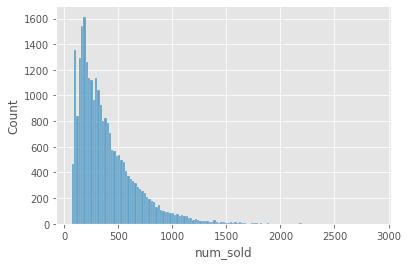

In [27]:
sns.histplot(data=train,x='num_sold')

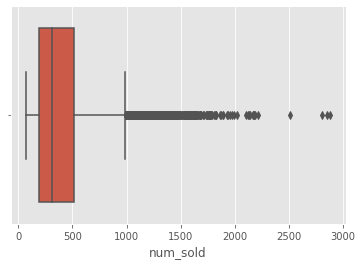

In [ ]:
sns.boxplot(data=train,x='num_sold')

### year,month,day

In [ ]:
print(train['date'].max())
print(train['date'].min())

2018-12-31 00:00:00
2015-01-01 00:00:00


In [ ]:
train['year'].value_counts()

2016    6588
2015    6570
2018    6570
2017    6570
Name: year, dtype: int64

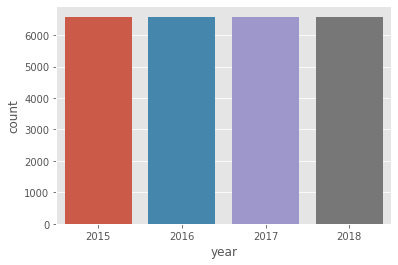

In [ ]:
sns.countplot(data=train,x='year')

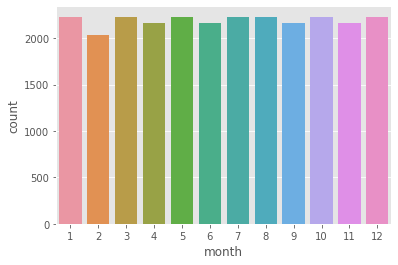

In [ ]:
sns.countplot(data=train,x='month')

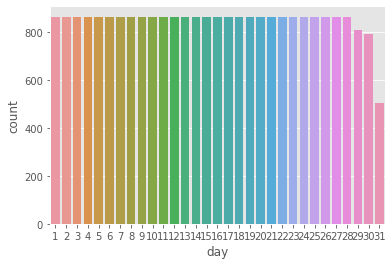

In [ ]:
sns.countplot(data=train,x='day')

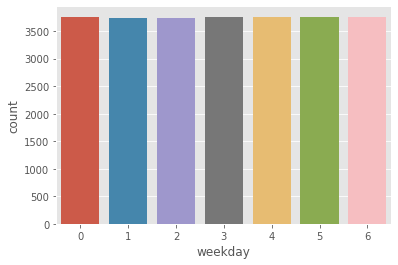

In [ ]:
sns.countplot(data=train,x='weekday')

In [ ]:
train['weekday'].value_counts()

6    3762
5    3762
4    3762
3    3762
0    3762
2    3744
1    3744
Name: weekday, dtype: int64

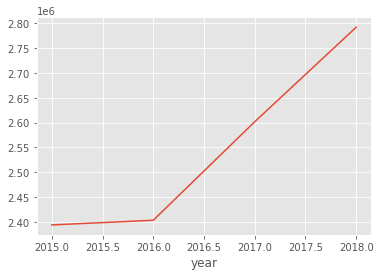

In [ ]:
train.groupby('year').sum()['num_sold'].plot()


As the years go by, sales are increasing.

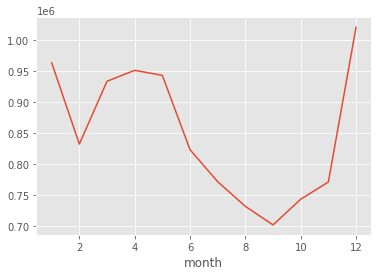

In [ ]:
train.groupby('month').sum()['num_sold'].plot()


In April, sales were quite high and then dropped. And December has the highest sales.

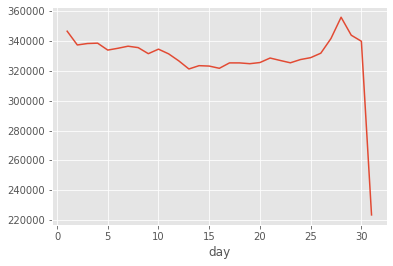

In [ ]:
train.groupby('day').sum()['num_sold'].plot()

Sales peaked on the 28th, but then suddenly the sales plummeted.

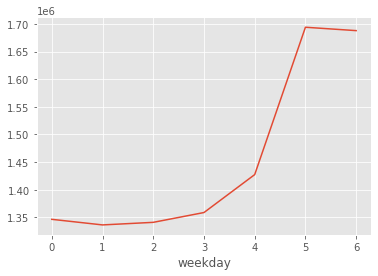

In [ ]:
train.groupby('weekday').sum()['num_sold'].plot()


Weekends are also the busiest.

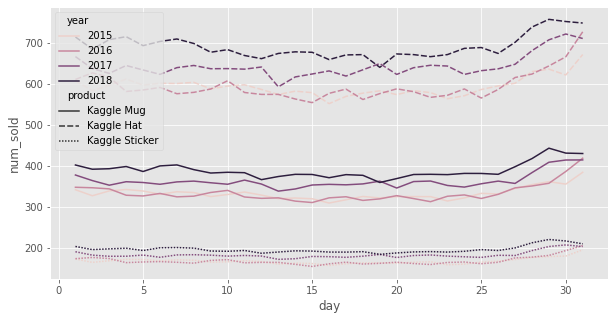

In [ ]:
plt.figure(figsize=(10,5))
sns.lineplot(data=train,
             x='day',
             y='num_sold',
             hue='year',
             style='product',
             legend='full',ci=None)

### country

In [ ]:
train['country'].value_counts()

Norway     8766
Sweden     8766
Finland    8766
Name: country, dtype: int64

In [ ]:
a=train.groupby('country').sum()['num_sold']
a

country
Finland    2680927
Norway     4404706
Sweden     3105725
Name: num_sold, dtype: int64

Text(0.5, 1.0, 'Sales by country')

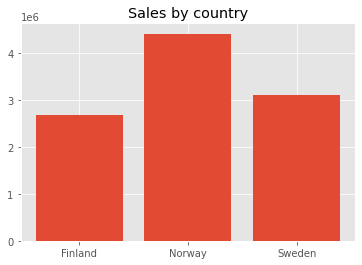

In [ ]:
label=a.index
index=np.arange(len(label))
plt.bar(index,a)
plt.xticks(index,label)
plt.title('Sales by country')


Sales by country

## store

In [ ]:
train['store'].value_counts()

KaggleRama    13149
KaggleMart    13149
Name: store, dtype: int64

In [ ]:
b=train.groupby(['country','store']).sum()['num_sold'].reset_index()
b

,country,store,num_sold
0,Finland,KaggleMart,978468
1,Finland,KaggleRama,1702459
2,Norway,KaggleMart,1605045
3,Norway,KaggleRama,2799661
4,Sweden,KaggleMart,1131855
5,Sweden,KaggleRama,1973870


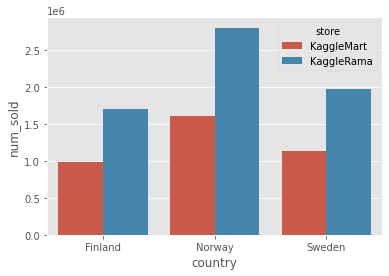

In [ ]:
sns.barplot(x='country', y='num_sold', hue='store',data=b )

### product

In [ ]:
train['product'].value_counts()

Kaggle Sticker    8766
Kaggle Mug        8766
Kaggle Hat        8766
Name: product, dtype: int64

In [ ]:
train.groupby(['country','store','product']).sum()['num_sold']

country  store       product       
Finland  KaggleMart  Kaggle Hat         529583
                     Kaggle Mug         298337
                     Kaggle Sticker     150548
         KaggleRama  Kaggle Hat         918862
                     Kaggle Mug         520278
                     Kaggle Sticker     263319
Norway   KaggleMart  Kaggle Hat         868777
                     Kaggle Mug         488515
                     Kaggle Sticker     247753
         KaggleRama  Kaggle Hat        1514119
                     Kaggle Mug         853659
                     Kaggle Sticker     431883
Sweden   KaggleMart  Kaggle Hat         612472
                     Kaggle Mug         344628
                     Kaggle Sticker     174755
         KaggleRama  Kaggle Hat        1068652
                     Kaggle Mug         600870
                     Kaggle Sticker     304348
Name: num_sold, dtype: int64

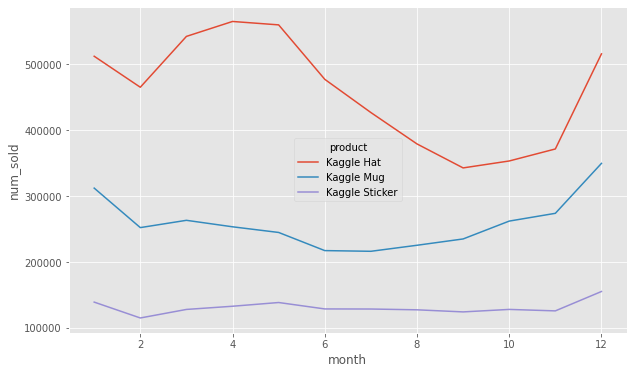

In [ ]:
c=train.groupby(['product','month']).sum()['num_sold'].reset_index()
plt.figure(figsize=(10,6))
sns.lineplot(x='month', y='num_sold', hue='product',data=c )


It seems that hats sell a lot in summer and mugs sell a lot in winter. Stickers sell a lot at the end of the year.

## pytrend

In [ ]:
!pip install -q pytrends

In [ ]:
from pytrends.request import TrendReq

dates='2015-01-01 2019-12-31'
kw_list=['kaggle']

## Finland

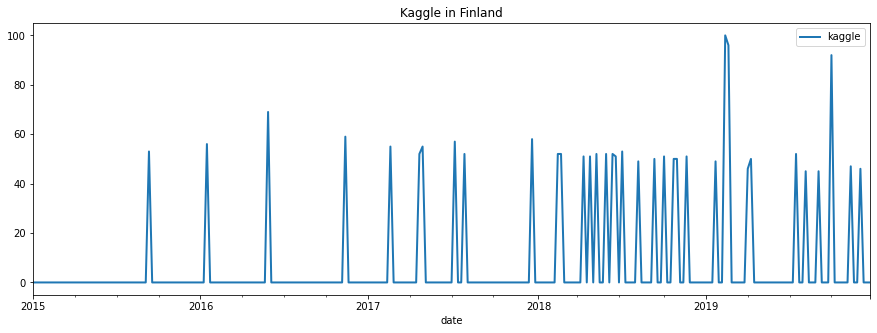

In [ ]:
pytrends=TrendReq(geo='FI')
pytrends.build_payload(kw_list=kw_list,timeframe=dates)
Finland_df=pytrends.interest_over_time()
Finland_df.plot(y=kw_list,kind='line',figsize=(15,5),lw=2,title='Kaggle in Finland');

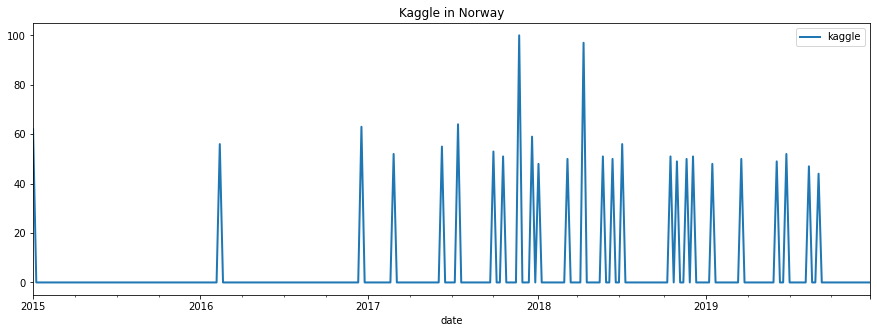

In [ ]:
pytrends=TrendReq(geo='NO')
pytrends.build_payload(kw_list=kw_list,timeframe=dates)
Finland_df=pytrends.interest_over_time()
Finland_df.plot(y=kw_list,kind='line',figsize=(15,5),lw=2,title='Kaggle in Norway');

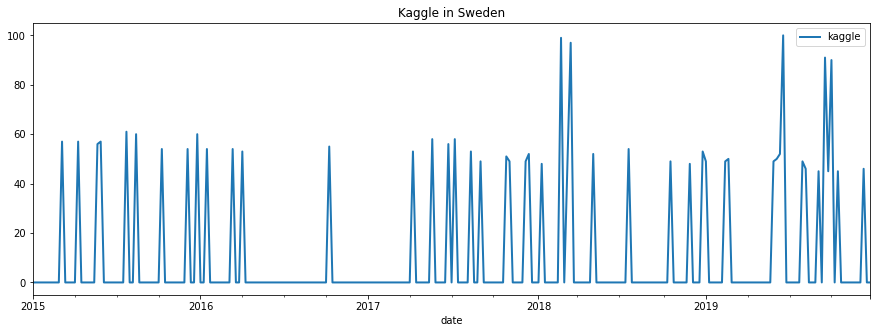

In [ ]:
pytrends = TrendReq(geo='SE')
pytrends.build_payload(kw_list=kw_list, timeframe=dates)
Sweden_df = pytrends.interest_over_time()
Sweden_df.plot(y=kw_list, kind='line',figsize=(15,5), lw=2, title="Kaggle in Sweden");

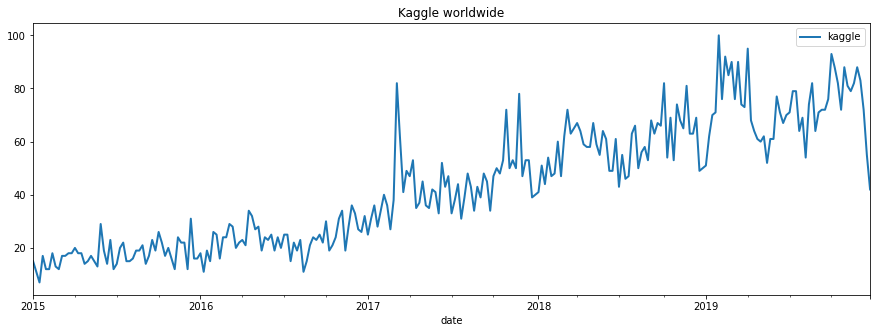

In [ ]:
pytrends = TrendReq(hl='en-US', tz=360)
pytrends.build_payload(kw_list=kw_list, timeframe=dates)
Worldwide_df = pytrends.interest_over_time()
Worldwide_df.plot(y=kw_list, kind='line',figsize=(15,5), lw=2, title="Kaggle worldwide");

## 데이터 전처리

- 필요없는 값 삭제 ( id, date)
- 범주형 데이터는 원핫 인코딩으로 처리하는게 좋을 듯 


In [28]:
train_dum=train_dum.drop(['row_id','date'],axis=1)
test_dum=test_dum.drop(['row_id','date'],axis=1)

In [29]:
X_train=train_dum.drop('num_sold',axis=1)
y_train=train_dum['num_sold']
X_test=test_dum

In [39]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)

(26298, 21)
(26298,)
(6570, 21)


In [ ]:
X_train=X_train.drop(['holiday','special_dates'],axis=1)


In [38]:
X_test=X_test.drop(['holiday','special_dates'],axis=1)

## 모델링

- RandomForestRegressor
- XGBoost regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf=RandomForestRegressor()
rf.fit(X_train,y_train)
rf_pred=rf.predict(X_test)



In [ ]:
from xgboost import XGBRegressor

xgb=XGBRegressor()
xgb.fit(X_train,y_train)
xgb_pred=xgb.predict(X_test)

[13:56:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
xgb_submit=sample.copy()
xgb_submit['num_sold']=xgb_pred
xgb_submit.to_csv('xgb.csv')

In [ ]:
rf_submit=sample.copy()
rf_submit['num_sold']=rf_pred
rf_submit.to_csv('rf.csv')

## 하이퍼파라미터 튜닝

In [40]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

params={
    'n_estimators':[100,500],
    'max_depth':[6,8,10,12],
    'min_samples_leaf':[8,12,18],
    'min_samples_split':[8,16,20]
}

rf_clf=RandomForestRegressor(random_state=0,n_jobs=-1)
grid_cv=GridSearchCV(rf_clf,param_grid=params,cv=3,n_jobs=-1)
grid_cv.fit(X_train,y_train)

print("최적 하이퍼 파라미터: ",grid_cv.best_params_)
print("최고 예측 정확도 : ",grid_cv.best_score_)

최적 하이퍼 파라미터:  {'max_depth': 12, 'min_samples_leaf': 8, 'min_samples_split': 8, 'n_estimators': 100}
최고 예측 정확도 :  0.9459793486050666


In [41]:
rf_clf=RandomForestRegressor(max_depth= 12, min_samples_leaf=8, min_samples_split=8, n_estimators=100)

rf_clf.fit(X_train,y_train)
rf_pred=rf_clf.predict(X_test)


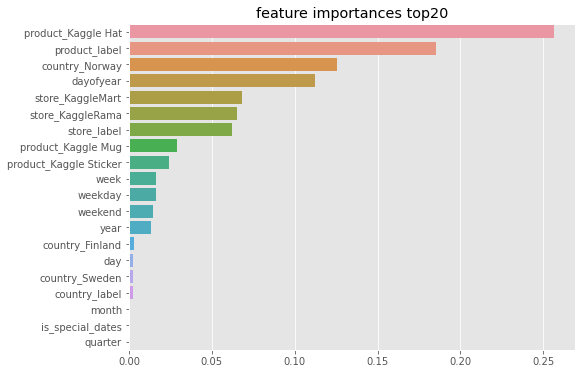

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

ftr_importances_values=rf_clf.feature_importances_
ftr_importances=pd.Series(ftr_importances_values,index=X_train.columns)
ftr_top20=ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
plt.title("feature importances top20")
sns.barplot(x=ftr_top20,y=ftr_top20.index)
plt.show()

In [43]:
rf_submit1=sample.copy()
rf_submit1['num_sold']=rf_pred
rf_submit1.to_csv('rf1.csv')

In [44]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor

params={
    'learning_rate':[0.01,0.05,0.1],
    'n_estimators':[100,300,500],
    'max_depth':[3,5,7],
    'sub_sample':[0.3,0.5,1],
    'colsample_bytree':[0.3,0.5,1],
}


xgb=XGBRegressor(random_state=0,n_jobs=-1)
grid_cv=GridSearchCV(xgb,param_grid=params,cv=3,n_jobs=-1)
grid_cv.fit(X_train,y_train)

print("최적 하이퍼 파라미터: ",grid_cv.best_params_)
print("최고 예측 정확도 : ",grid_cv.best_score_)

[17:11:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
최적 하이퍼 파라미터:  {'colsample_bytree': 0.3, 'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 500, 'sub_sample': 0.3}
최고 예측 정확도 :  0.9620305353890934


In [45]:
xgb=XGBRegressor(colsample_bytree=0.3, learning_rate= 0.05, max_depth= 5, 
                 n_estimators= 500, sub_sample= 0.3)
xgb.fit(X_train,y_train)
xgb_pred=xgb.predict(X_test)

[17:12:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [46]:
xgb_submit=sample.copy()
xgb_submit['num_sold']=xgb_pred
xgb_submit.to_csv('xgb1.csv')

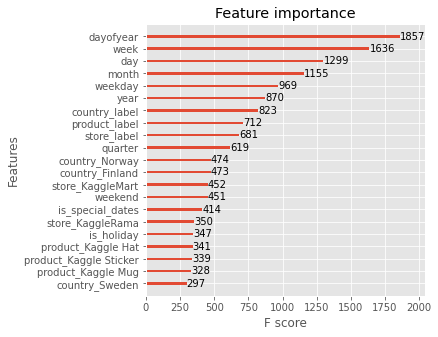

In [47]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig,ax=plt.subplots(figsize=(5,5))
plot_importance(xgb,ax=ax)